In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset1=pd.read_csv("Google_Stock_Price_Train.csv")
dataset2=pd.read_csv("Google_Stock_Price_Test.csv")

In [2]:
#Part 1 Data Preprocessing
train_set = dataset1.iloc[:,1:2].values

In [3]:
#Step 2 Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range= (0,1))
train_scaled_set=sc.fit_transform(train_set)

In [4]:
#Creating a data structure with 60 timesteps and 1 output
X_train=[]
Y_train=[]
for i in range(60,1258):
    X_train.append(train_scaled_set[i-60:i,0])
    Y_train.append(train_scaled_set[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [5]:
#reshaping
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [6]:
#Building the arcitecture of RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\Sahil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
regressor = Sequential()


In [8]:
#Adding the first LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [9]:
#LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

In [10]:
#Output Layer
regressor.add(Dense(units=1))

In [11]:
#Compiling the RNN
regressor.compile(optimizer='adam',loss= 'mean_squared_error')

In [12]:
#Fitting the RNN to the training set
regressor.fit(X_train,Y_train, epochs=25,batch_size=64)

Epoch 1/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0969
Epoch 2/25
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0170
Epoch 3/25
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0077
Epoch 4/25
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0060
Epoch 5/25
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0056
Epoch 6/25
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0050
Epoch 7/25
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 8/25
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0049
Epoch 9/25
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0053
Epoch 10/25
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0049
Epoch 11/25
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0048
Epoch 12/25
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0041
E

In [13]:
#Making the predictions and visualizing the results
test_set=dataset2.iloc[:,1:2].values

In [14]:
print(test_set)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [15]:
print(train_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [16]:
#getting the predicted stock price
dataset_total=np.concatenate((train_set,test_set),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set)-60:]
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [17]:
#Creating Structure
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test=np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regressor.predict(X_test)
#rescaling for original value
pred=sc.inverse_transform(pred)

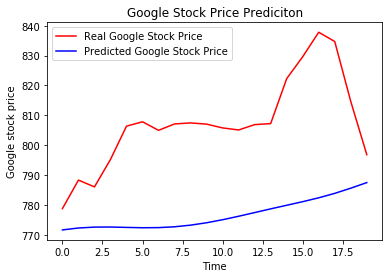

In [18]:
#visualizing the result
plt.plot(test_set,color='red',label='Real Google Stock Price')
plt.plot(pred,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediciton')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()
